### Modelling LLM and KMeans

#### Importing Libriaries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import plotly.express as px
from sentence_transformers import SentenceTransformer

In [7]:
df = pd.read_csv("../data/customer_segmentation_data.csv", index_col=0)

In [9]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53
2,21,Female,78852,60,2,42,Sports,41.93
3,60,Female,126573,30,2,28,Clothing,424.36
4,40,Other,47099,74,9,5,Home & Garden,991.93
5,65,Female,140621,21,3,25,Electronics,347.08


In [11]:
def compile_text(x):
    text =  f"""Age: {x['age']},  
                Gender: {x['gender']}, 
                Income: {x['income']}, 
                Spending Score: {x['spending_score']}, 
                Membership Years: {x['membership_years']}, 
                Purchase Frequency: {x['purchase_frequency']}, 
                Preferred Category {x['preferred_category']}, 
                Last Purchase Amount: {x['last_purchase_amount']}
            """
    return text

In [13]:
sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()

In [15]:
sentences

['Age: 38,  \n                Gender: Female, \n                Income: 99342, \n                Spending Score: 90, \n                Membership Years: 3, \n                Purchase Frequency: 24, \n                Preferred Category Groceries, \n                Last Purchase Amount: 113.53\n            ',
 'Age: 21,  \n                Gender: Female, \n                Income: 78852, \n                Spending Score: 60, \n                Membership Years: 2, \n                Purchase Frequency: 42, \n                Preferred Category Sports, \n                Last Purchase Amount: 41.93\n            ',
 'Age: 60,  \n                Gender: Female, \n                Income: 126573, \n                Spending Score: 30, \n                Membership Years: 2, \n                Purchase Frequency: 28, \n                Preferred Category Clothing, \n                Last Purchase Amount: 424.36\n            ',
 'Age: 40,  \n                Gender: Other, \n                Income: 47099,

In [17]:
st = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")
embeddings = st.encode(sentences=sentences, show_progress_bar=True, normalize_embeddings=True)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [19]:
df_embeddings = pd.DataFrame(embeddings)
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.128919,0.018802,0.017610,0.015273,-0.063845,0.006663,0.043117,0.014547,0.030800,-0.031547,...,-0.030477,-0.011759,0.032337,-0.019068,0.013171,-0.047307,0.141870,-0.149211,-0.036414,0.007651
1,0.146798,0.043052,0.038957,-0.049340,-0.027332,0.060722,0.063192,0.037616,0.036274,0.051367,...,-0.072844,0.050022,0.031459,0.010182,-0.041805,-0.080456,0.135701,-0.124584,-0.069779,0.038629
2,0.133121,0.039109,0.050674,0.026709,-0.044650,0.045502,0.054269,0.000129,0.011673,0.010109,...,-0.078417,-0.011928,0.017897,0.004131,-0.024112,-0.021435,0.114762,-0.202251,-0.055834,0.023179
3,0.162141,0.046291,0.046636,0.011723,-0.053426,0.004203,0.030444,0.012624,0.016441,0.020501,...,-0.048189,0.009313,0.039150,-0.011950,-0.001500,-0.103295,0.116990,-0.132518,-0.084367,0.045300
4,0.120824,0.052006,0.036548,-0.027248,-0.057341,0.011872,0.032228,0.047716,0.029470,0.018106,...,-0.053879,-0.019161,0.035603,-0.003260,-0.055214,-0.050772,0.137438,-0.162516,-0.033802,0.045574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.133572,0.045150,0.023001,0.009577,-0.045384,0.048264,0.063274,-0.001718,0.011595,0.022672,...,-0.065675,-0.015052,0.017161,0.012558,-0.009959,-0.043672,0.144167,-0.209149,-0.057699,0.028132
996,0.128934,0.031603,0.000780,0.016312,-0.042770,0.001376,0.057597,0.033205,0.028486,-0.039809,...,-0.022968,-0.018683,0.036535,-0.024214,0.019005,-0.052408,0.125491,-0.159204,-0.037798,0.006967
997,0.140166,0.055411,0.018571,-0.089248,-0.035060,0.060263,0.064979,0.025428,0.035641,0.048973,...,-0.037712,0.041089,0.015828,0.023450,-0.032022,-0.117672,0.130351,-0.131134,-0.062193,0.044958
998,0.098809,0.056113,0.029880,-0.033001,-0.086345,0.014896,0.031651,0.068475,0.054611,0.027562,...,-0.054079,-0.012792,0.040869,-0.012979,-0.048921,-0.049391,0.136089,-0.156845,-0.028526,0.024607


In [21]:
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
custom_palette = sns.color_palette('RdBu_r', n_colors=10)

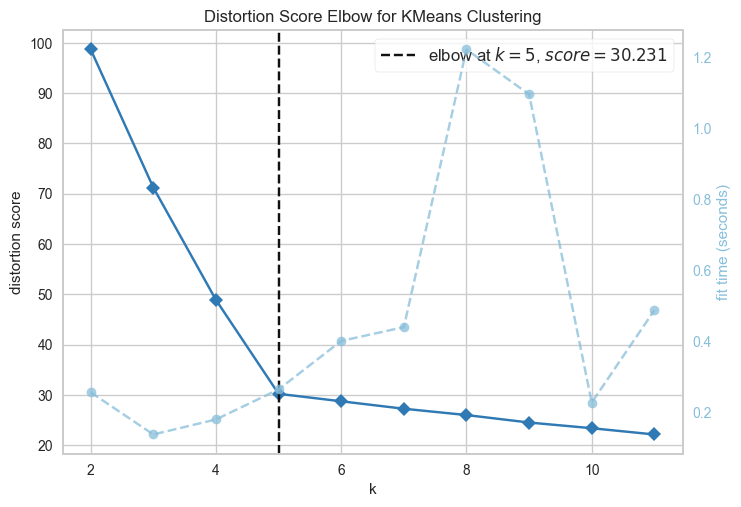

In [23]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(df_embeddings)
visualizer.show();

In [25]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_embeddings)
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(df_embeddings, cluster_labels))

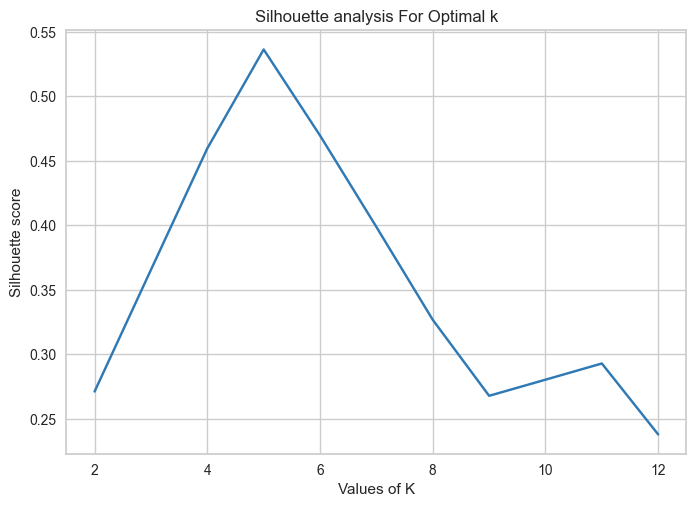

In [26]:
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

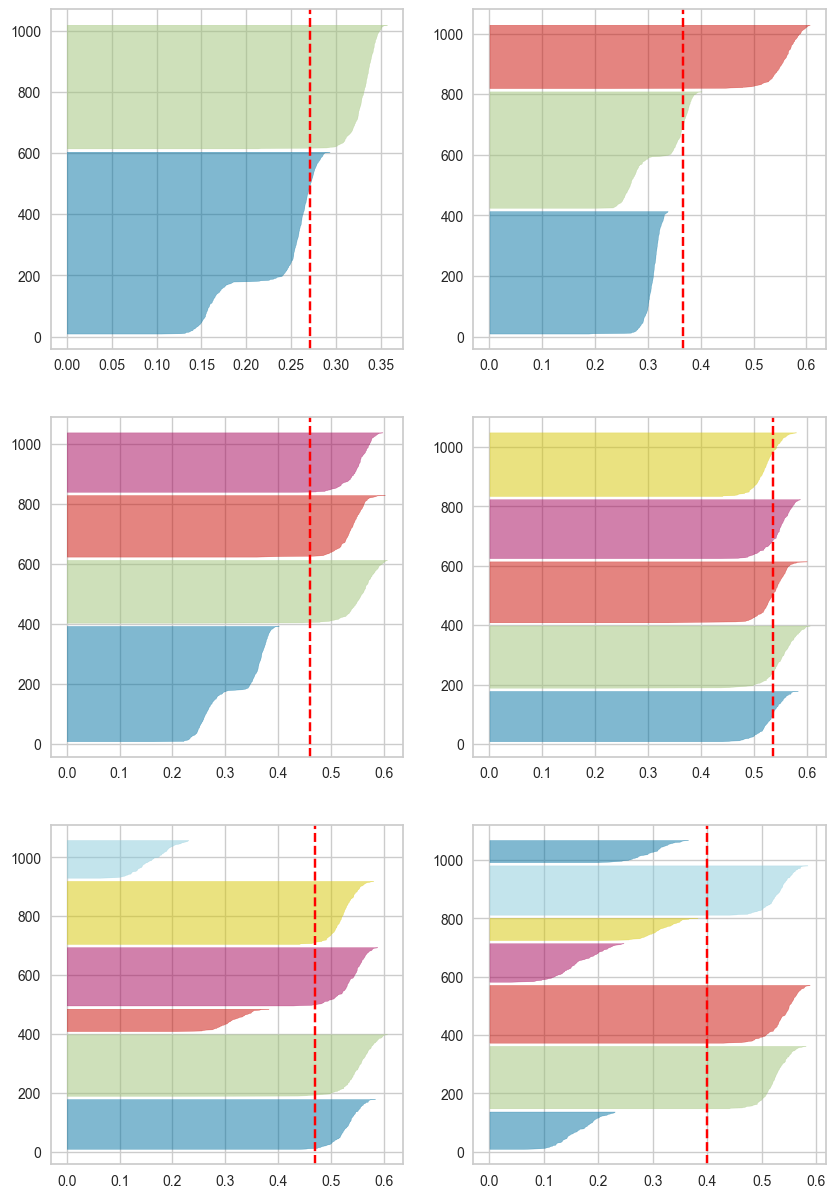

In [33]:
figa, ax = plt.subplots(3, 2, figsize=(10,15))
for i in [2,3,4,5,6,7]:
    kmean = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmean, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_embeddings)

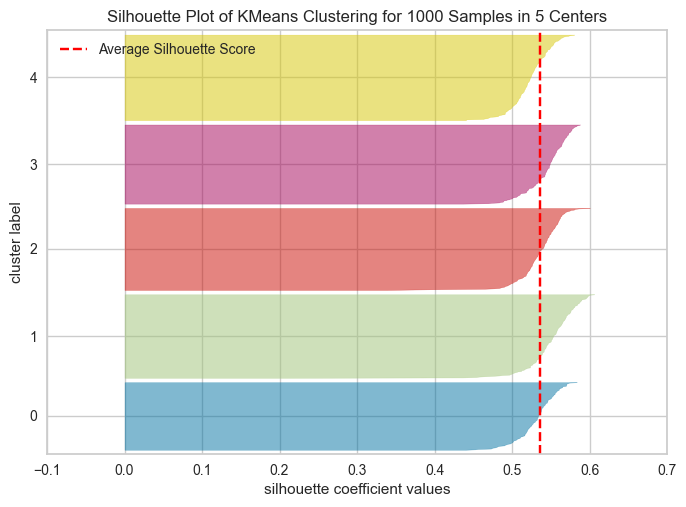

In [179]:
km = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_embeddings)
visualizer.show();

In [181]:
km.fit(df_embeddings)
cluster_labels = km.labels_
clusters = pd.DataFrame(cluster_labels, columns=['cluster'])
clusters.head()

,cluster
0,3
1,1
2,0
3,2
4,4


In [183]:
df_seg = pd.concat([df_embeddings,clusters], axis=1)
df_seg.head()

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,cluster
0,0.128919,0.018802,0.017610,0.015273,-0.063845,0.006663,0.043117,0.014547,0.030800,-0.031547,...,-0.011759,0.032337,-0.019068,0.013171,-0.047307,0.141870,-0.149211,-0.036414,0.007651,3
1,0.146798,0.043052,0.038957,-0.049340,-0.027332,0.060722,0.063192,0.037616,0.036274,0.051367,...,0.050022,0.031459,0.010182,-0.041805,-0.080456,0.135701,-0.124584,-0.069779,0.038629,1
2,0.133121,0.039109,0.050674,0.026709,-0.044650,0.045502,0.054269,0.000129,0.011673,0.010109,...,-0.011928,0.017897,0.004131,-0.024112,-0.021435,0.114762,-0.202251,-0.055834,0.023179,0
3,0.162141,0.046291,0.046636,0.011723,-0.053426,0.004203,0.030444,0.012624,0.016441,0.020501,...,0.009313,0.039150,-0.011950,-0.001500,-0.103295,0.116990,-0.132518,-0.084367,0.045300,2
4,0.120824,0.052006,0.036548,-0.027248,-0.057341,0.011872,0.032228,0.047716,0.029470,0.018106,...,-0.019161,0.035603,-0.003260,-0.055214,-0.050772,0.137438,-0.162516,-0.033802,0.045574,4


In [185]:
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_seg.drop('cluster',axis=1))

In [187]:
df_seg['PCA1'] = pca_components[:,0]
df_seg['PCA2'] = pca_components[:,1]

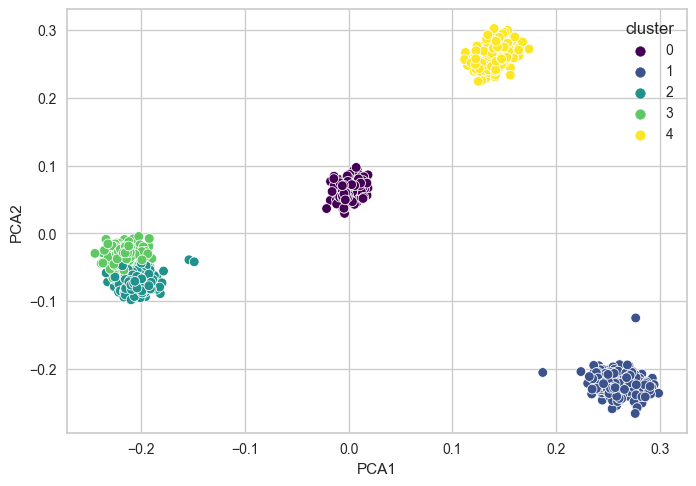

In [189]:
aa = sns.scatterplot(data=df_seg, x='PCA1', y='PCA2', hue='cluster', palette='viridis');

In [191]:
pca_1 = PCA(n_components=3, random_state=42)
pca_components_1 = pca_1.fit_transform(df_seg.drop(['cluster','PCA1','PCA2'],axis=1))

In [193]:
df_seg['PCA_1'] = pca_components_1[:,0]
df_seg['PCA_2'] = pca_components_1[:,1]
df_seg['PCA_3'] = pca_components_1[:,2]

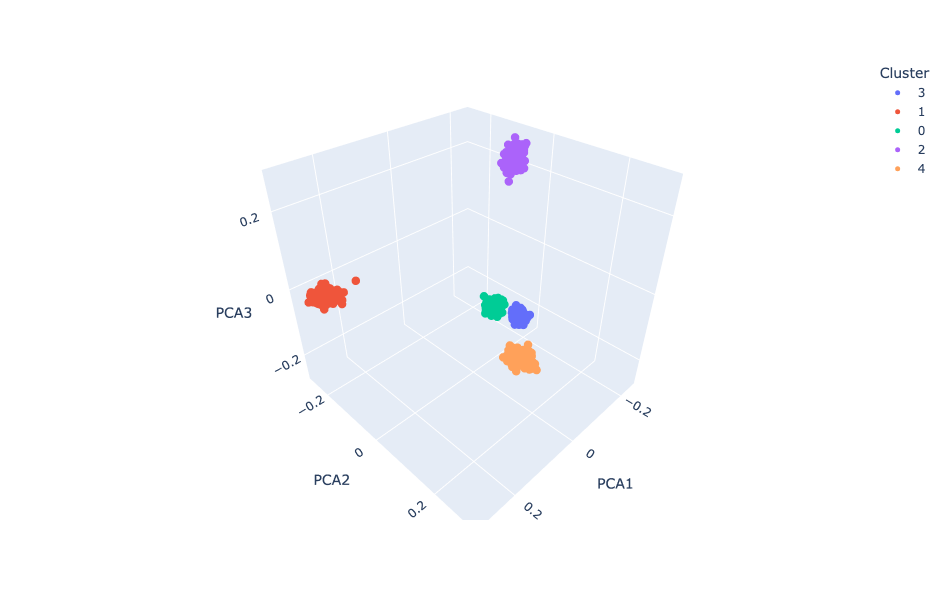

In [195]:
fig = px.scatter_3d(x=df_seg['PCA_1'],y=df_seg['PCA_2'],z=df_seg['PCA_3'],
                    color=df_seg['cluster'].astype(str),
                    labels={
                        'x':'PCA1',
                        'y':'PCA2',
                        'z':'PCA3'
                    },
                    template='plotly')
fig.update_layout(width=800,
                  height=600,
                  legend_title_text='Cluster')


fig.update_traces(marker=dict(size=5))
fig.show()

In [197]:
explained_variance_ratio = pca_1.explained_variance_ratio_
for indx, evr in enumerate(explained_variance_ratio):
    print(f"PC{indx+1}: {evr:.2f}")

PC1: 0.28
PC2: 0.21
PC3: 0.17


In [199]:
pca_results = pd.concat([pd.DataFrame(pca_1.explained_variance_,columns=['EigenValue']),pd.DataFrame(pca_1.explained_variance_ratio_,columns=['% of Variance'])],axis=1)
pca_results['% of variance (Cum)'] = pca_results['% of Variance'].cumsum()*100
pca_results

,EigenValue,% of Variance,% of variance (Cum)
0,0.036734,0.277159,27.715862
1,0.027364,0.206458,48.361652
2,0.022519,0.169904,65.352097


In [201]:
df_analysis = pd.concat([df,clusters], axis=1)

In [203]:
df_analysis

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,cluster
1,38.0,Female,99342.0,90.0,3.0,24.0,Groceries,113.53,1.0
2,21.0,Female,78852.0,60.0,2.0,42.0,Sports,41.93,0.0
3,60.0,Female,126573.0,30.0,2.0,28.0,Clothing,424.36,2.0
4,40.0,Other,47099.0,74.0,9.0,5.0,Home & Garden,991.93,4.0
5,65.0,Female,140621.0,21.0,3.0,25.0,Electronics,347.08,2.0
...,...,...,...,...,...,...,...,...,...
997,23.0,Other,65337.0,76.0,10.0,23.0,Groceries,632.83,1.0
998,23.0,Male,113097.0,40.0,5.0,42.0,Sports,75.09,4.0
999,22.0,Female,113695.0,63.0,7.0,44.0,Electronics,505.16,3.0
1000,36.0,Female,90420.0,7.0,2.0,31.0,Groceries,669.26,NaN


In [253]:
df_group = df_analysis.groupby('cluster').agg(
    {
        'age': 'mean',
        'gender': lambda x: x.value_counts().index[0],
        'income': 'mean',
        'spending_score': 'mean',
        'membership_years': 'mean',
        'purchase_frequency':'mean',
        'preferred_category': lambda x: ', '.join(x.value_counts().index[[0,1,2]].tolist()),
        'last_purchase_amount': 'mean',
        
    }
)
df_group

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
cluster,,,,,,,,
0.0,43.958824,Female,83992.617647,53.058824,5.735294,25.870588,"Sports, Home & Garden, Groceries",508.714412
1.0,42.109524,Male,90502.866667,51.580952,5.347619,25.947619,"Home & Garden, Groceries, Electronics",480.705952
2.0,44.446602,Male,86849.766990,47.422330,5.592233,27.378641,"Home & Garden, Electronics, Sports",497.720583
3.0,44.555556,Other,91060.050505,51.843434,5.434343,27.217172,"Electronics, Sports, Home & Garden",435.559293
4.0,43.967442,Male,89326.004651,50.195349,5.306977,26.460465,"Electronics, Sports, Groceries",537.109442


In [207]:
cluster_summary = df_analysis.groupby('cluster').agg({
    'age': ['min','mean','max'],
    'income': ['min','mean','max'],
    'spending_score': ['min','mean','max'],
    'purchase_frequency': ['min','mean','max'],
    'last_purchase_amount': ['min','mean','max']
})
cluster_summary

age                    income                          \
          min       mean   max      min          mean       max   
cluster                                                           
0.0      18.0  43.958824  69.0  30708.0  83992.617647  149744.0   
1.0      18.0  42.109524  69.0  30004.0  90502.866667  149973.0   
2.0      18.0  44.446602  69.0  30058.0  86849.766990  149578.0   
3.0      18.0  44.555556  69.0  30102.0  91060.050505  149936.0   
4.0      18.0  43.967442  69.0  30374.0  89326.004651  148121.0   

        spending_score                   purchase_frequency                   \
                   min       mean    max                min       mean   max   
cluster                                                                        
0.0                1.0  53.058824  100.0                1.0  25.870588  50.0   
1.0                1.0  51.580952  100.0                1.0  25.947619  50.0   
2.0                1.0  47.422330  100.0                2.0  27.378641  50.0   
3.0                1.0  51.843434  100.0                1.0  27.217172  50.0   
4.0                1.0  50.195349  100.0                1.0  26.460465  50.0   

        last_purchase_amount                      
                         min        mean     max  
cluster                                           
0.0                    11.01  508.714412  998.51  
1.0                    12.36  480.705952  990.87  
2.0                    10.40  497.720583  997.15  
3.0                    11.29  435.559293  999.74  
4.0                    21.43  537.109442  998.98

In [209]:
cluster_distribution = df_analysis['cluster'].value_counts()
print(cluster_distribution)

cluster
4.0    215
1.0    210
2.0    206
3.0    199
0.0    170
Name: count, dtype: int64


In [211]:
pref_category_summary = df_analysis.groupby(['cluster', 'preferred_category']).size().unstack(fill_value=0)
pref_category_summary

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
cluster,,,,,
0.0,28,34,36,36,36
1.0,35,42,43,48,42
2.0,35,44,38,46,43
3.0,35,45,38,39,41
4.0,37,50,43,37,48


In [213]:
pref_category_proportions = pref_category_summary.div(pref_category_summary.sum(axis=1), axis=0)
pref_category_proportions

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
cluster,,,,,
0.0,0.164706,0.200000,0.211765,0.211765,0.211765
1.0,0.166667,0.200000,0.204762,0.228571,0.200000
2.0,0.169903,0.213592,0.184466,0.223301,0.208738
3.0,0.176768,0.227273,0.191919,0.196970,0.207071
4.0,0.172093,0.232558,0.200000,0.172093,0.223256


In [215]:
gen_category_summary = df_analysis.groupby(['cluster', 'gender']).size().unstack(fill_value=0)
gen_category_summary

gender,Female,Male,Other
cluster,,,
0.0,59,55,56
1.0,67,73,70
2.0,63,76,67
3.0,64,66,68
4.0,62,87,66


In [217]:
gen_category_proportions = gen_category_summary.div(gen_category_summary.sum(axis=1), axis=0)
gen_category_proportions

gender,Female,Male,Other
cluster,,,
0.0,0.347059,0.323529,0.329412
1.0,0.319048,0.347619,0.333333
2.0,0.305825,0.368932,0.325243
3.0,0.323232,0.333333,0.343434
4.0,0.288372,0.404651,0.306977


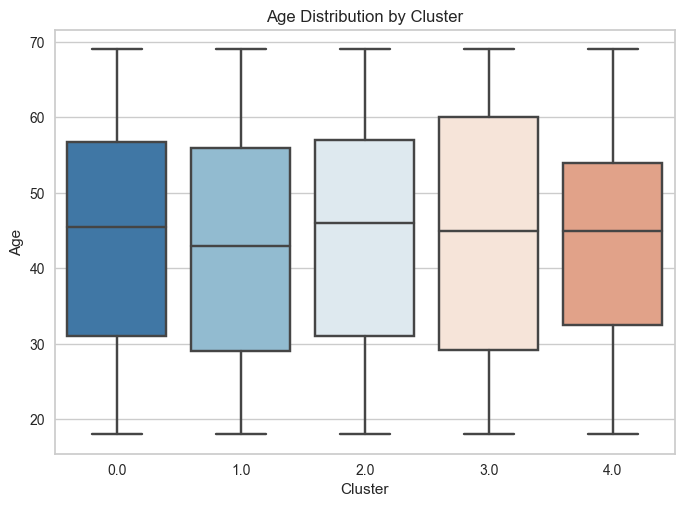

In [219]:
a = sns.boxplot(data=df_analysis, x='cluster', y='age')
a.set(xlabel='Cluster', ylabel='Age', title='Age Distribution by Cluster');

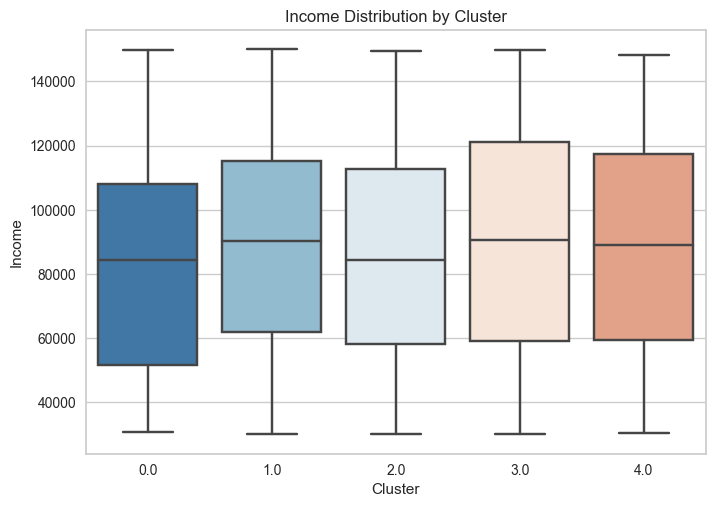

In [221]:
b = sns.boxplot(data=df_analysis, x='cluster', y='income')
b.set(xlabel='Cluster', ylabel='Income', title='Income Distribution by Cluster');

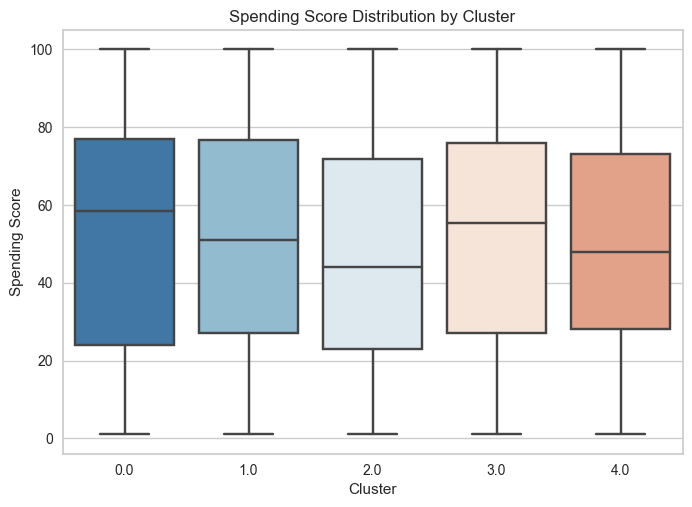

In [223]:
c = sns.boxplot(data=df_analysis, x='cluster', y='spending_score')
c.set(xlabel='Cluster', ylabel='Spending Score', title='Spending Score Distribution by Cluster');

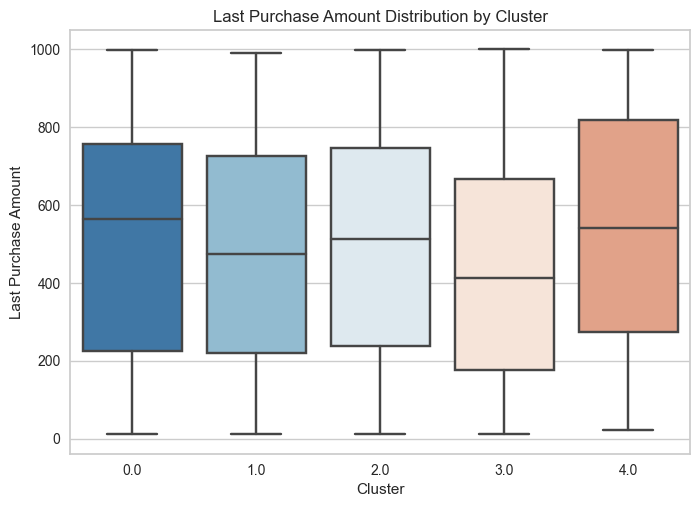

In [225]:
d = sns.boxplot(data=df_analysis, x='cluster', y='last_purchase_amount')
d.set(ylabel='Last Purchase Amount', xlabel='Cluster', title='Last Purchase Amount Distribution by Cluster');

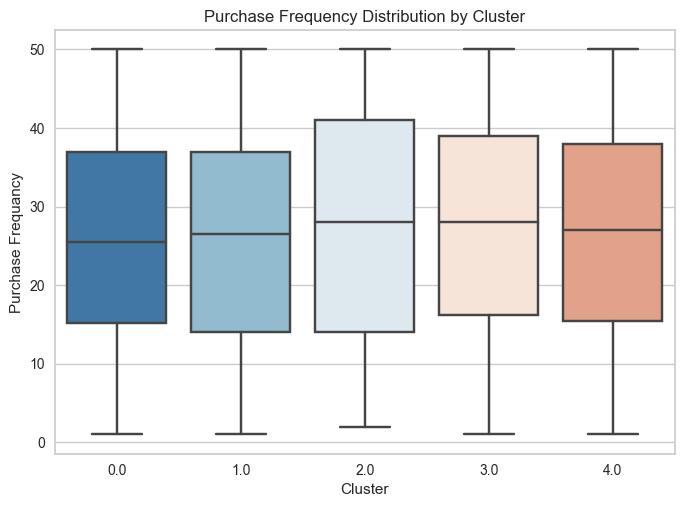

In [227]:
e = sns.boxplot(data=df_analysis, x='cluster', y='purchase_frequency')
e.set(xlabel='Cluster', ylabel='Purchase Frequancy', title='Purchase Frequency Distribution by Cluster');

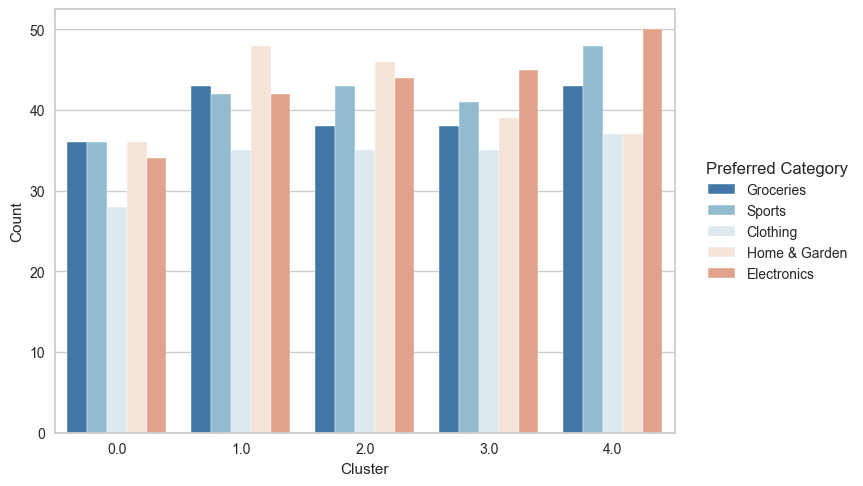

In [229]:
f = sns.countplot(data=df_analysis, hue='preferred_category', x='cluster')
f.set(xlabel = 'Cluster', ylabel='Count')
f.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.3, 0.5));

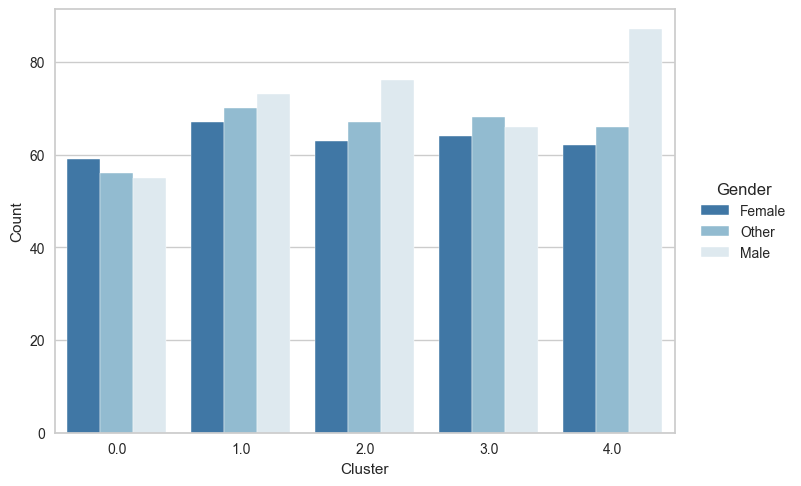

In [231]:
g = sns.countplot(data=df_analysis, hue='gender', x='cluster')
g.set(xlabel = 'Cluster', ylabel='Count')
g.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5));

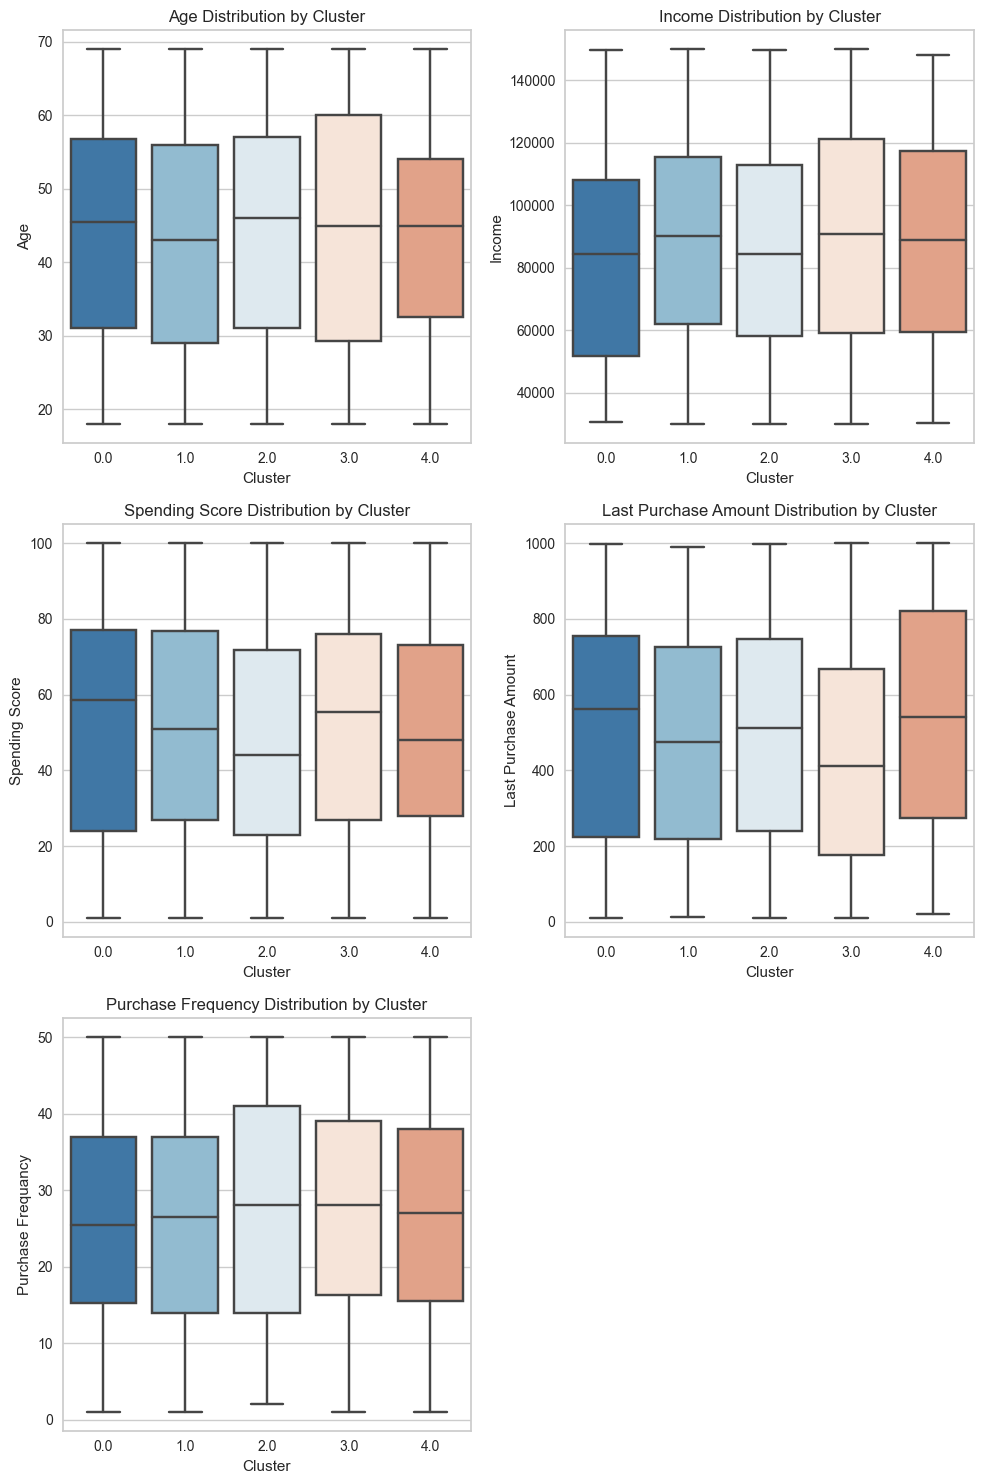

In [233]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten() 

a = sns.boxplot(data=df_analysis, x='cluster', y='age', ax=axes[0])
a.set(xlabel='Cluster', ylabel='Age', title='Age Distribution by Cluster')
b = sns.boxplot(data=df_analysis, x='cluster', y='income', ax=axes[1])
b.set(xlabel='Cluster', ylabel='Income', title='Income Distribution by Cluster')
c = sns.boxplot(data=df_analysis, x='cluster', y='spending_score', ax=axes[2])
c.set(xlabel='Cluster', ylabel='Spending Score', title='Spending Score Distribution by Cluster')
d = sns.boxplot(data=df_analysis, x='cluster', y='last_purchase_amount', ax=axes[3])
d.set(ylabel='Last Purchase Amount', xlabel='Cluster', title='Last Purchase Amount Distribution by Cluster')
e = sns.boxplot(data=df_analysis, x='cluster', y='purchase_frequency', ax=axes[4])
e.set(xlabel='Cluster', ylabel='Purchase Frequancy', title='Purchase Frequency Distribution by Cluster')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [255]:
df_group

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
cluster,,,,,,,,
0.0,43.958824,Female,83992.617647,53.058824,5.735294,25.870588,"Sports, Home & Garden, Groceries",508.714412
1.0,42.109524,Male,90502.866667,51.580952,5.347619,25.947619,"Home & Garden, Groceries, Electronics",480.705952
2.0,44.446602,Male,86849.766990,47.422330,5.592233,27.378641,"Home & Garden, Electronics, Sports",497.720583
3.0,44.555556,Other,91060.050505,51.843434,5.434343,27.217172,"Electronics, Sports, Home & Garden",435.559293
4.0,43.967442,Male,89326.004651,50.195349,5.306977,26.460465,"Electronics, Sports, Groceries",537.109442


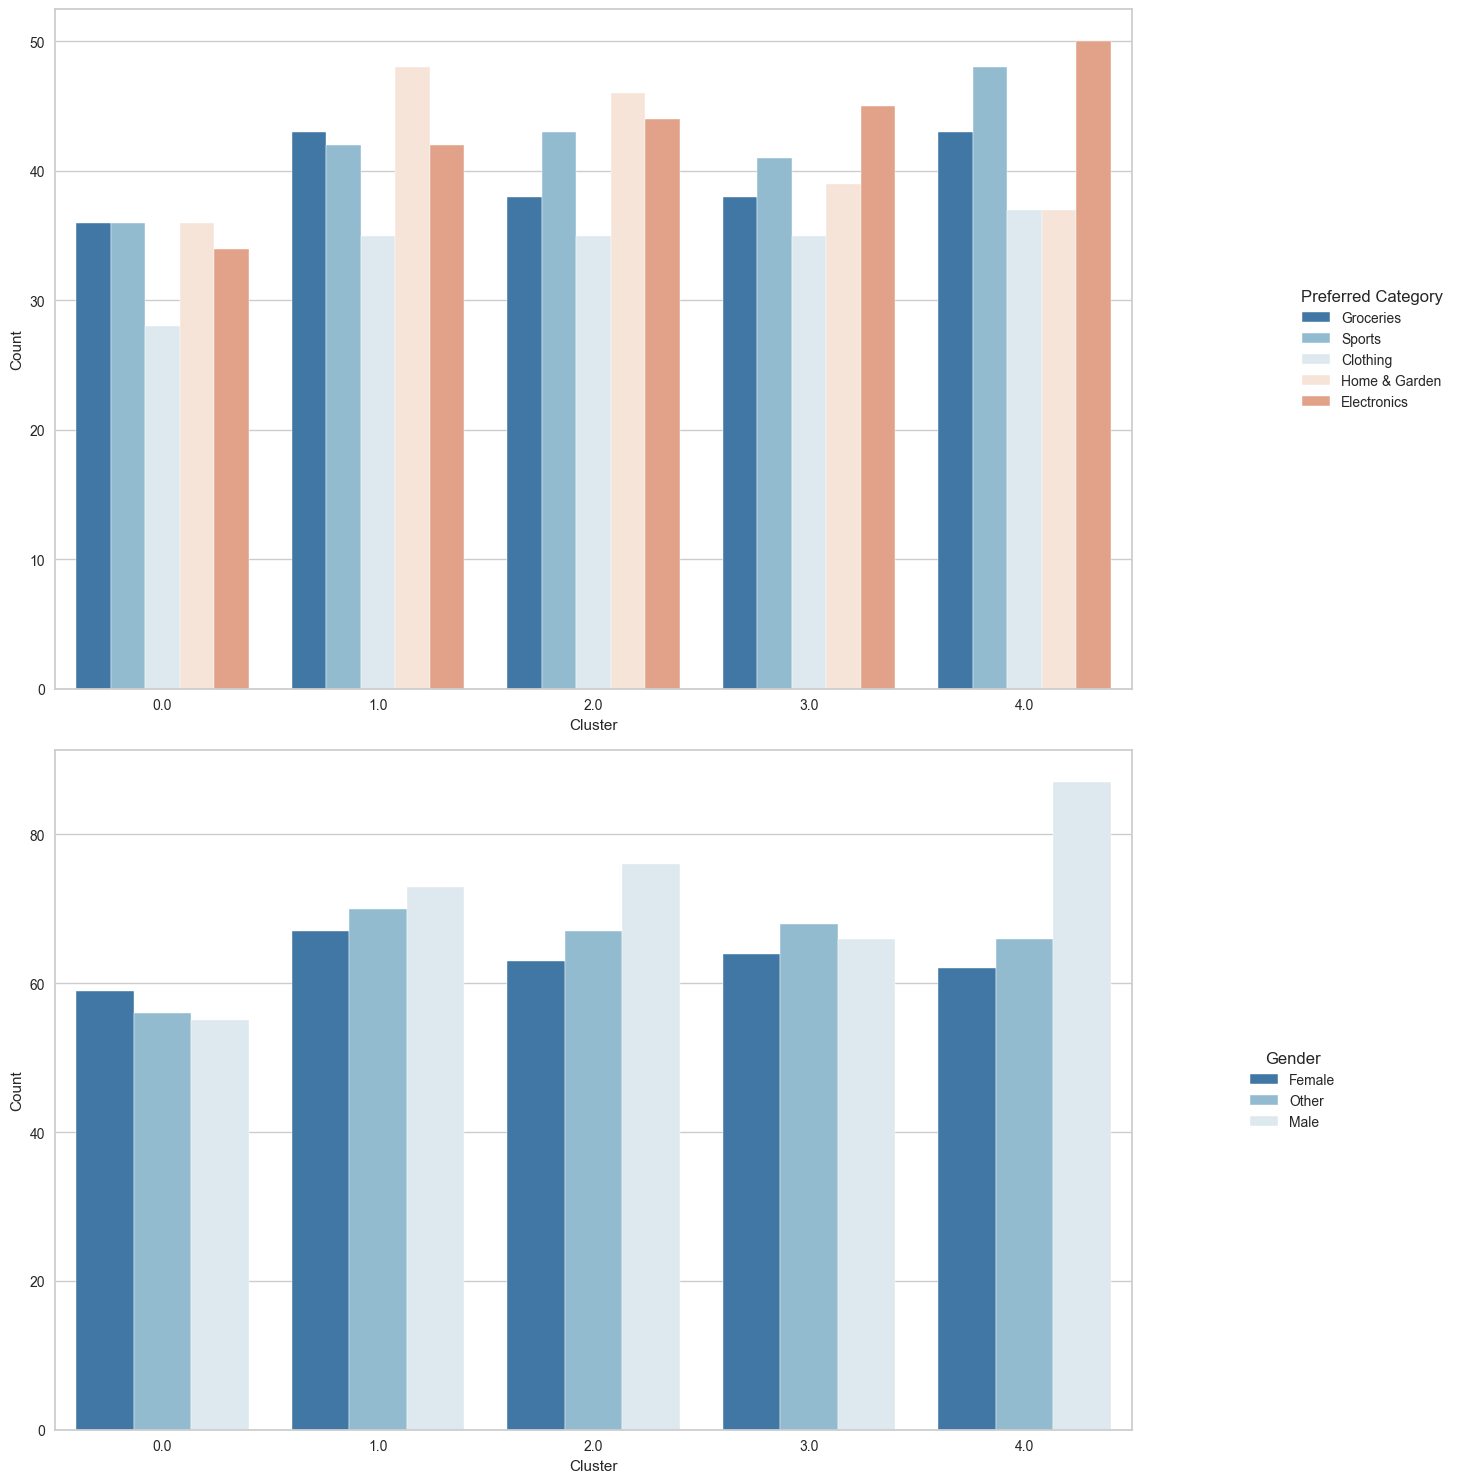

In [235]:
fig1, axes1 = plt.subplots(2, 1, figsize=(15, 15))
axes1 = axes1.flatten() 

f = sns.countplot(data=df_analysis, hue='preferred_category', x='cluster', ax=axes1[0])
f.set(xlabel = 'Cluster', ylabel='Count')
f.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.3, 0.5))
g = sns.countplot(data=df_analysis, hue='gender', x='cluster', ax=axes1[1])
g.set(xlabel = 'Cluster', ylabel='Count')
g.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
I have been clustering mixed data (6 continuous variables and 2 categorical variables) for a customer segmentation project. I started using KMeans - I first standardised and then used one hot encoding to format my categorical variables. When deciding on clusters I used an elbow plot (using distortion score) and silhouette score. For clusters 2 to 12 there was no clear elbow and the silhouette scores were low (ranging from 0.098 to 0.108) and fluctuating. I did a PCA analysis with 3 components (theses explained 44% of variance) and plotted it on a 3D scatterplot using 6 clusters which recommended by the KElbowVisualizer function from the yellowbrick.cluster package. The points were in a ball like shape and were somewhat separated (there was overlap). I decided to use a different approach recommend by article published in Towards Data Science (https://medium.com/towards-data-science/mastering-customer-segmentation-with-llm-3d9008235f41). In the approach I combined each customers data into text, I then used SentenceTransformer using the paraphrase-MiniLM-L6-v2 model to embed the text, and determined the number of clusters to use after fitting the embedded data using KMeans clustering. 5 Clusters were used - there was a distinct elbow in the distortion score elbow plot, a much higher silhouette score of 0.55 (this was for 5 clusters and is the highest for all cluster ranging from 2 to 12). When doing PCA with 3 components and plotting the 3D scatterplot by cluster there was clear separation per cluster. The issue I am facing is that when analysing the clusters from both approaches the characteristics of each cluster in the first approach are more distinct than in the second approach even though the silhouette score was significantly higher for the second approach. For the second approach the average age, income, spending score are similar in all clusters, whereas in the first approach there are distinct differences for the previously mentioned factors in each cluster. The second approach looks like it 